<a href="https://colab.research.google.com/github/Cammie-Lin/Brazil-Patient-No-show/blob/main/No_Show_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Univariate Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Cleaning**

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/KaggleV2-May-2016.csv")
df = df.rename(columns={'Handcap': 'Handicap'})
df = df.rename(columns={'Hipertension': 'Hypertension'})
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['WaitingDays'] = (df['AppointmentDay'].dt.normalize() - df['ScheduledDay'].dt.normalize()).dt.days
for col in ['Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show']:
  print(f"{col}: {df[col].unique()}") #所有统计结果的异常值查看
df['Neighbourhood'].nunique() #看社区有多少个唯一值：81
df['Neighbourhood'].value_counts() #看统计的哪个社区最多，结合上面的唯一值来判断是否有重复的异常值
print(df[df['Age'] < 0]) #找出年龄异常值
df = df[df['Age'] >= 0] #删除年龄异常值
print(df.head())

Gender: ['F' 'M']
Scholarship: [0 1]
Hypertension: [1 0]
Diabetes: [0 1]
Alcoholism: [0 1]
Handicap: [0 1 2 3 4]
SMS_received: [0 1]
No-show: ['No' 'Yes']
          PatientId  AppointmentID Gender              ScheduledDay  \
99832  4.659432e+14        5775010      F 2016-06-06 08:58:13+00:00   

                 AppointmentDay  Age Neighbourhood  Scholarship  Hypertension  \
99832 2016-06-06 00:00:00+00:00   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handicap  SMS_received No-show  WaitingDays  
99832         0           0         0             0      No            0  
      PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4  8.841186e+12        5642494      F 2016-04-29 16:07

# **No-show Rate**

About 20.2% of patients did not show up.

No-show
No     88207
Yes    22319
Name: count, dtype: int64
No-show
No     0.798066
Yes    0.201934
Name: proportion, dtype: float64


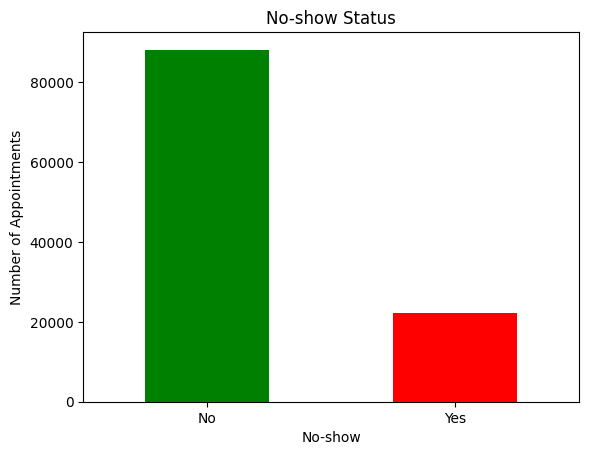

In [ ]:
import matplotlib.pyplot as plt
print(df['No-show'].value_counts())
print(df['No-show'].value_counts(normalize=True))
df['No-show'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('No-show Status')
plt.xticks(rotation=0)
plt.ylabel('Number of Appointments')
plt.show()

# **Population Variables**

# **1.Age**

RSD=62%, the sample data is very unstable. While it seemed reasonable to have 3,539 one-year-old children, it was highly unlikely that there were five 115-year-old individuals in the same city. Therefore, I removed the data of these patients.

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64
Age
0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: count, Length: 103, dtype: int64


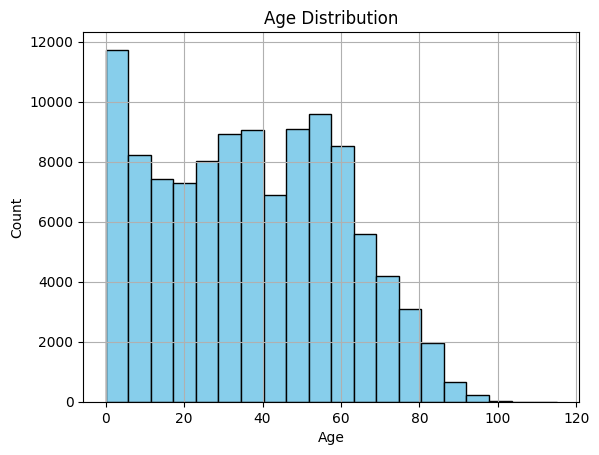

In [ ]:
import matplotlib.pyplot as plt
print(df['Age'].describe())
print(df['Age'].value_counts())
df['Age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
df = df[df['Age'] <= 100]
print(df['Age'].value_counts())

Age
0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
96       17
97       11
98        6
100       4
99        1
Name: count, Length: 101, dtype: int64


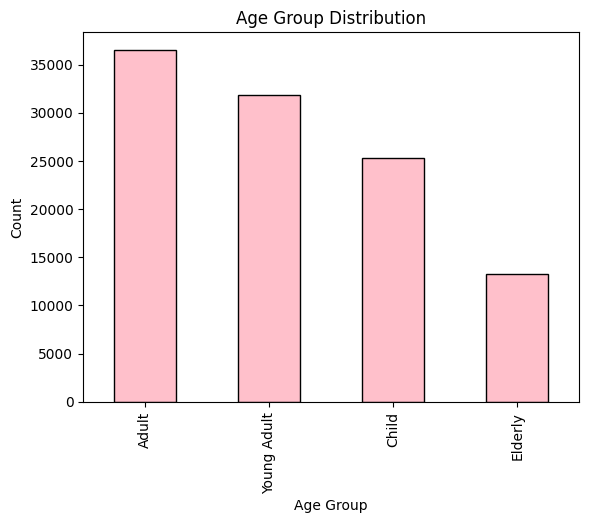

In [ ]:
bins = [0, 18, 40, 65, 100]
labels = ['Child', 'Young Adult', 'Adult', 'Elderly']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
df['AgeGroup'].value_counts().plot(kind='bar', color='pink', edgecolor='black')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

Conclusion: Adult > Young Adult > Child > Elderly (Numerically)

In [ ]:
#bining
import matplotlib.pyplot as plt
bins = [0, 18, 40, 65, 100]
labels = ['Child', 'Young Adult', 'Adult', 'Elderly']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
print(df.groupby('AgeGroup')['No-show'].value_counts(normalize=True).unstack())

No-show            No       Yes
AgeGroup                       
Child        0.774628  0.225372
Young Adult  0.768206  0.231794
Adult        0.821274  0.178726
Elderly      0.844817  0.155183


/tmp/ipython-input-246532388.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AgeGroup')['No-show'].value_counts(normalize=True).unstack())


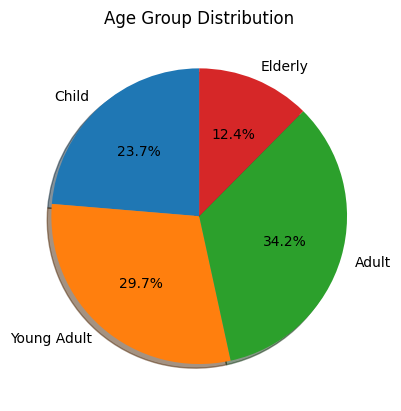

In [ ]:
df['AgeGroup'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Age Group Distribution')
plt.ylabel('')
plt.show()

Conclusion: The “Child” age group has the highest no-show rate, and the “Elderly” group shows the lowest no-show rate. The “Young Adult” and “Adult” groups have similar no-show proportions.

# **2.Gender**

In [ ]:
print(df['Gender'].describe())
print(df['Gender'].value_counts())
print(df['Gender'].value_counts(normalize=True))

count     110519
unique         2
top            F
freq       71832
Name: Gender, dtype: object
Gender
F    71832
M    38687
Name: count, dtype: int64
Gender
F    0.649952
M    0.350048
Name: proportion, dtype: float64


Conclusion: Among all appointments, around 65% were scheduled by female patients and 35% by male patients.

# **Appointment Information Variables**

# **1.Waiting Days**

In [ ]:
print(df['WaitingDays'].describe())

count    110519.000000
mean         10.183887
std          15.255169
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: WaitingDays, dtype: float64


In [ ]:
df=df[df['WaitingDays'] >=0]
print(df['WaitingDays'].describe())
#print(df['WaitingDays'].value_counts())
print(df['WaitingDays'].value_counts(normalize=True))
q95 = df['WaitingDays'].quantile(0.95)
print(f"95% patients waiting days are less than：{q95} days")

count    110514.000000
mean         10.184438
std          15.255288
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: WaitingDays, dtype: float64
WaitingDays
0      0.348915
2      0.060843
4      0.047867
1      0.047170
7      0.044393
         ...   
139    0.000009
132    0.000009
117    0.000009
146    0.000009
123    0.000009
Name: proportion, Length: 129, dtype: float64
95% patients waiting days are less than：39.0 days


Conclusion: 95% patients waiting days are less than：39.0 days

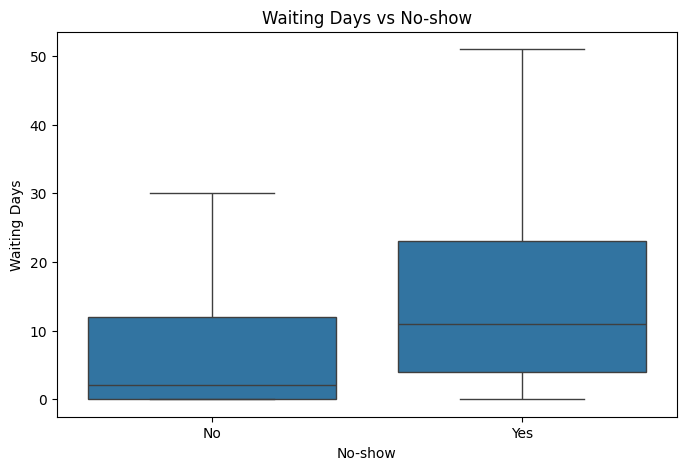

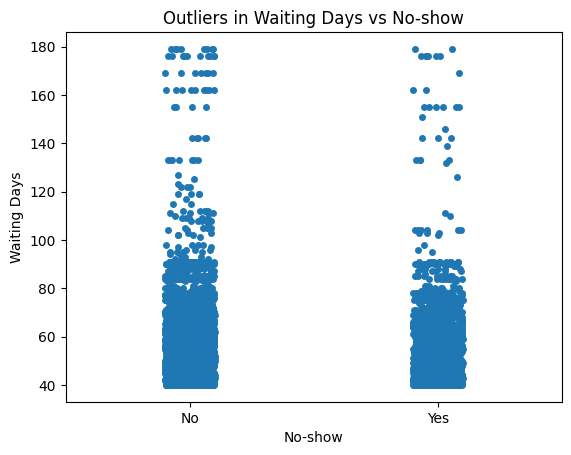

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='No-show', y='WaitingDays', data=df, showfliers=False)
plt.title('Waiting Days vs No-show')
plt.xlabel('No-show')
plt.ylabel('Waiting Days')
plt.show()

outliers = df[df['WaitingDays'] > 39]#先检查 WaitingDays 这一列，大于 39 的标记为 True，其他是 False → 再用这个 True/False 去原表里挑出对应的行 →挑出来的就是 outliers
sns.stripplot(x='No-show', y='WaitingDays', data=outliers)
plt.title('Outliers in Waiting Days vs No-show')
plt.xlabel('No-show')
plt.ylabel('Waiting Days')
plt.show()

In [ ]:
long_attend = df[(df['No-show'] == 'No') & (df['WaitingDays'] > 175)]
long_attend[['ScheduledDay', 'AppointmentDay', 'WaitingDays']].sort_values(by='WaitingDays')

,ScheduledDay,AppointmentDay,WaitingDays
3764,2015-11-10 07:13:56+00:00,2016-05-04 00:00:00+00:00,176
102815,2015-12-08 14:45:00+00:00,2016-06-01 00:00:00+00:00,176
102811,2015-12-08 14:44:39+00:00,2016-06-01 00:00:00+00:00,176
102812,2015-12-15 10:24:32+00:00,2016-06-08 00:00:00+00:00,176
102808,2015-12-15 10:24:12+00:00,2016-06-08 00:00:00+00:00,176
102807,2015-12-08 14:44:16+00:00,2016-06-01 00:00:00+00:00,176
102804,2015-12-15 10:21:19+00:00,2016-06-08 00:00:00+00:00,176
102801,2015-12-08 14:43:14+00:00,2016-06-01 00:00:00+00:00,176
102870,2015-12-15 10:19:31+00:00,2016-06-08 00:00:00+00:00,176
102819,2015-12-15 10:25:40+00:00,2016-06-08 00:00:00+00:00,176


/tmp/ipython-input-476077367.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_show_by_wait = df.groupby('WaitingDaysGroup')['No-show'].value_counts(normalize=True).unstack()


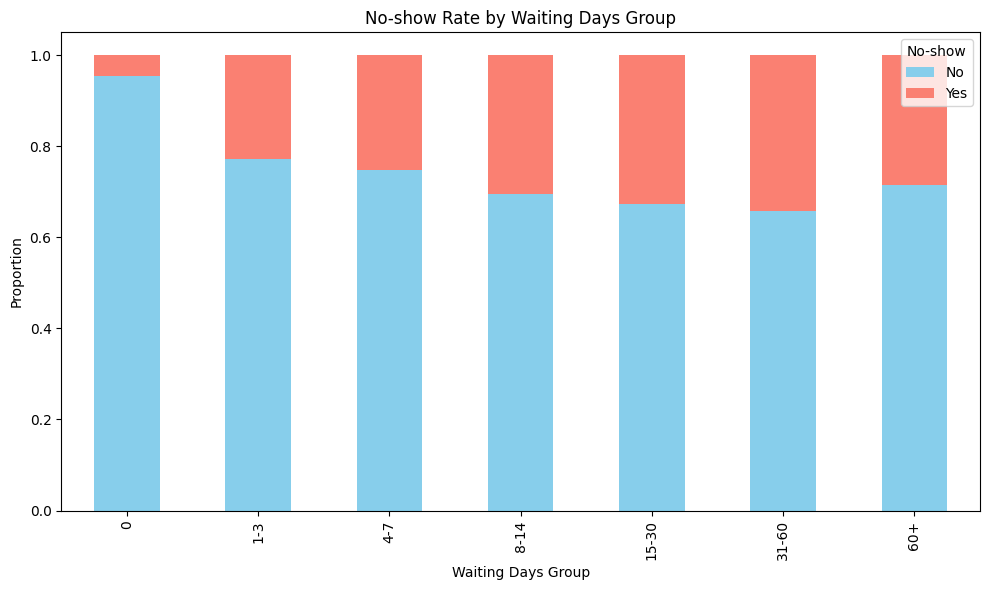

In [ ]:
df['WaitingDaysGroup'] = pd.cut(df['WaitingDays'], bins=[-1, 0, 3, 7, 14, 30, 60, 999],
                                labels=['0', '1-3', '4-7', '8-14', '15-30', '31-60', '60+'])

no_show_by_wait = df.groupby('WaitingDaysGroup')['No-show'].value_counts(normalize=True).unstack()

no_show_by_wait.plot(kind='bar', stacked=True, figsize=(10,6), color=['skyblue', 'salmon'])
plt.title('No-show Rate by Waiting Days Group')
plt.xlabel('Waiting Days Group')
plt.ylabel('Proportion')
plt.legend(title='No-show')
plt.tight_layout()
plt.show()

Conclusion: Based on the above data and background that Brazil public medical resource was limited, it is reasonable that patients waited for a long period. When the waiting period is longer, the risk of patient absence is higher.

# **2.SMS_received**

In [ ]:
print(df['SMS_received'].describe())
print(df['SMS_received'].value_counts())
print(df['SMS_received'].value_counts(normalize=True))

count    110514.000000
mean          0.321054
std           0.466884
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: SMS_received, dtype: float64
SMS_received
0    75033
1    35481
Name: count, dtype: int64
SMS_received
0    0.678946
1    0.321054
Name: proportion, dtype: float64


Conclusion: About 68% individuals did not receive SMS, which is high.

   SMS_received  total  no_show_rate
0             0  75033      0.166953
1             1  35481      0.275753


/tmp/ipython-input-2160445793.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


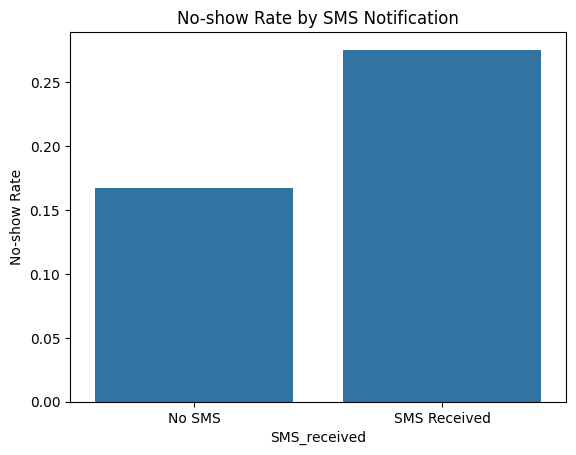

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算缺席率
sms_stats = df.groupby('SMS_received').agg(
    total = ('No-show', 'count'),
    no_show_rate = ('No-show', lambda x: (x == 'Yes').mean())
).reset_index()

print(sms_stats)

# 绘图：分组柱状图
sns.barplot(
    data=df,
    x='SMS_received',
    y=(df['No-show'] == 'Yes'),
    ci=None
)
plt.xticks([0, 1], ['No SMS', 'SMS Received'])
plt.ylabel('No-show Rate')
plt.title('No-show Rate by SMS Notification')
plt.show()


In [ ]:
import pandas as pd

# 1. 年龄分段
bins_age = [0, 17, 39, 64, 100]
labels_age = ['0-17', '18-39', '40-64', '65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age, right=True)

# 2. 等待天数分段
bins_wait = [0, 7, 30, df['WaitingDays'].max()]
labels_wait = ['0-7', '8-30', '31+']
df['WaitGroup'] = pd.cut(df['WaitingDays'], bins=bins_wait, labels=labels_wait, right=True)

# 3. 分层计算缺席率
sms_strata = df.groupby(['AgeGroup', 'WaitGroup', 'SMS_received']).agg(
    total = ('No-show', 'count'),
    no_show_rate = ('No-show', lambda x: (x == 'Yes').mean())
).reset_index()

print(sms_strata.sort_values(by=['AgeGroup', 'WaitGroup', 'SMS_received']))

   AgeGroup WaitGroup  SMS_received  total  no_show_rate
0      0-17       0-7             0   3400      0.277353
1      0-17       0-7             1   2062      0.259457
2      0-17      8-30             0   2684      0.403130
3      0-17      8-30             1   3721      0.317925
4      0-17       31+             0    827      0.477630
5      0-17       31+             1   1341      0.366145
6     18-39       0-7             0   5291      0.279531
7     18-39       0-7             1   3363      0.296759
8     18-39      8-30             0   3520      0.398580
9     18-39      8-30             1   5733      0.346067
10    18-39       31+             0   1000      0.441000
11    18-39       31+             1   1711      0.366452
12    40-64       0-7             0   7743      0.226527
13    40-64       0-7             1   4322      0.204304
14    40-64      8-30             0   3627      0.325338
15    40-64      8-30             1   5644      0.250886
16    40-64       31+          

/tmp/ipython-input-1979901250.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sms_strata = df.groupby(['AgeGroup', 'WaitGroup', 'SMS_received']).agg(


Conclusion: Patients who received SMS reminders had a higher overall no-show rate, likely because messages were primarily sent to high-risk groups.

However, in certain specific segments—particularly among patients with longer waiting times—SMS reminders may have reduced the no-show rate, suggesting that the reminder effect is more pronounced in these groups.

# **Health and Social Varaiables**

# **1.Scholarship**

In [ ]:
print(df['Scholarship'].describe())
print(df['Scholarship'].value_counts())
print(df['Scholarship'].value_counts(normalize=True))

count    110514.000000
mean          0.098277
std           0.297690
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Scholarship, dtype: float64
Scholarship
0    99653
1    10861
Name: count, dtype: int64
Scholarship
0    0.901723
1    0.098277
Name: proportion, dtype: float64


Conclusion: 90% individuals did not have scholarship.

# **2.Hypertension/Diabetes/Alchoholism/Handicap**

Hypertension: count    110514.000000
mean          0.197260
std           0.397932
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Hypertension, dtype: float64
Hypertension: Hypertension
0    88714
1    21800
Name: count, dtype: int64
Hypertension: Hypertension
0    0.80274
1    0.19726
Name: proportion, dtype: float64
Diabetes: count    110514.000000
mean          0.071873
std           0.258279
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Diabetes, dtype: float64
Diabetes: Diabetes
0    102571
1      7943
Name: count, dtype: int64
Diabetes: Diabetes
0    0.928127
1    0.071873
Name: proportion, dtype: float64
Alcoholism: count    110514.000000
mean          0.030403
std           0.171695
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Alcoholism, dtype: float64
Alc

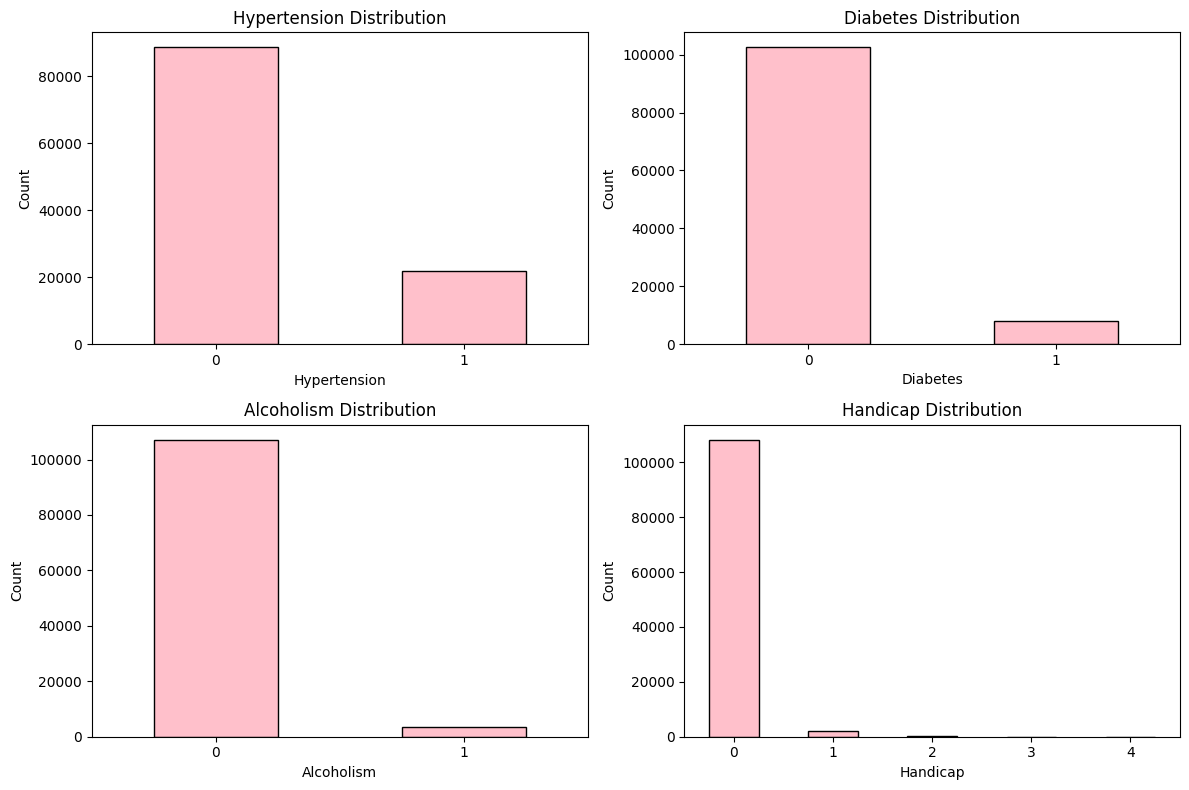

In [ ]:
for col in ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']:
  print(f"{col}: {df[col].describe()}")
  print(f"{col}: {df[col].value_counts()}")
  print(f"{col}: {df[col].value_counts(normalize=True)}")

import matplotlib.pyplot as plt

cols = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']

plt.figure(figsize=(12, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    df[col].value_counts().sort_index().plot(kind='bar', color='pink', edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Conclusion: Most of appointmented patients did not have hipertension, diabetes, alcoholism and handicap.

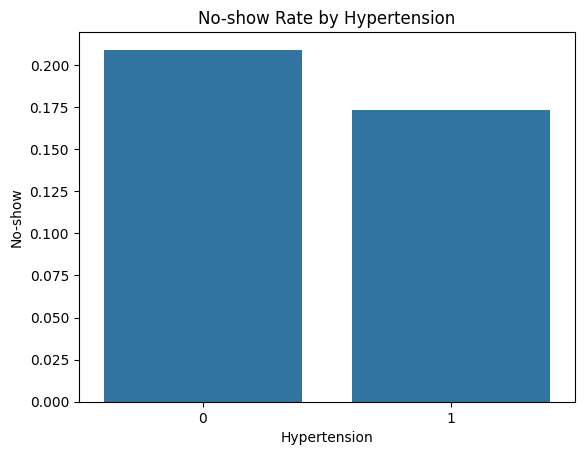

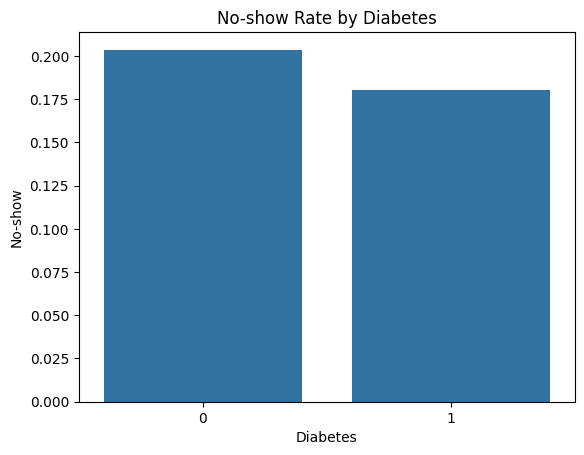

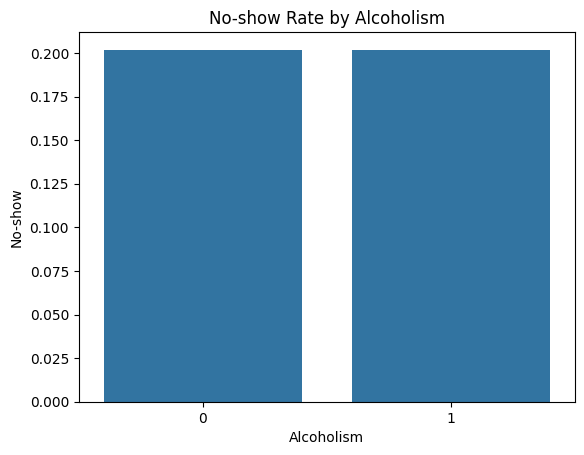

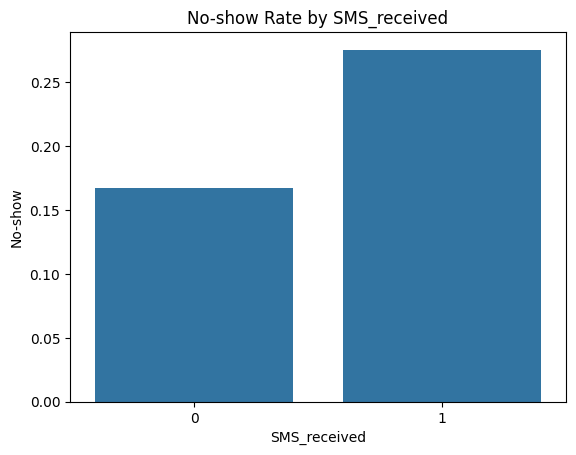

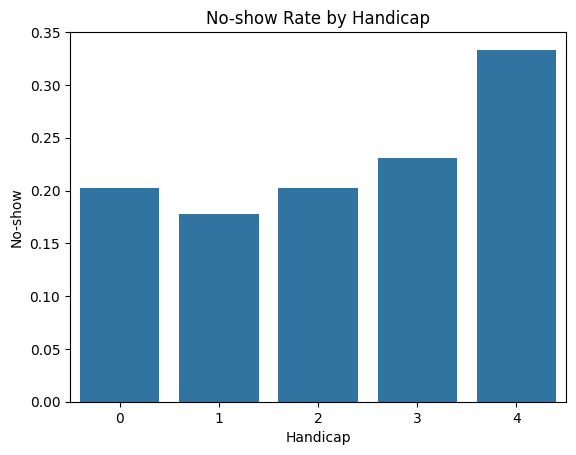

In [ ]:
def plot_no_show_rate(df, col):
    temp = df.groupby(col)['No-show'].apply(lambda x: (x == 'Yes').mean()).reset_index()
    sns.barplot(x=col, y='No-show', data=temp)
    plt.title(f'No-show Rate by {col}')
    plt.show()
for col in ['Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'Handicap']:
    plot_no_show_rate(df, col)


/tmp/ipython-input-1488590808.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


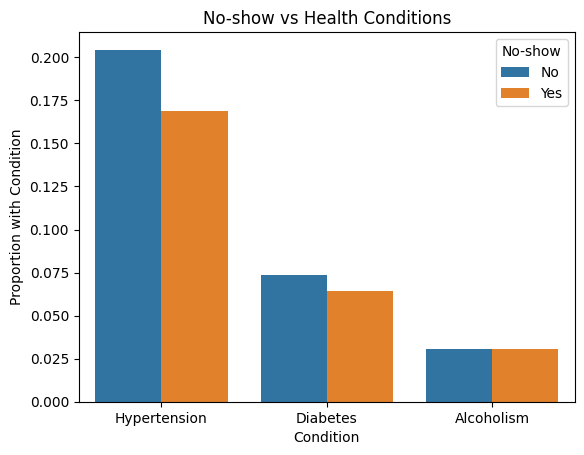

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 选出需要的列
cols = ['No-show', 'Hypertension', 'Diabetes', 'Alcoholism']
df_sub = df[cols]

# 把数据转换成长表（方便 Seaborn 画图）
df_melt = df_sub.melt(id_vars='No-show', var_name='Condition', value_name='HasCondition')

# 画分组柱状图（比例）
sns.barplot(
    data=df_melt,
    x='Condition',
    y='HasCondition',
    hue='No-show',
    ci=None
)

plt.ylabel('Proportion with Condition')
plt.title('No-show vs Health Conditions')
plt.show()

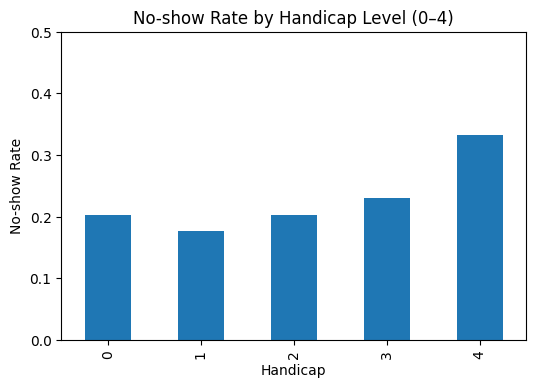

In [ ]:
hand_lv = df.groupby('Handicap')['No-show'].apply(lambda s: s.eq('Yes').mean())

ax = hand_lv.plot(kind='bar', figsize=(6,4))
ax.set_ylabel('No-show Rate')
ax.set_title('No-show Rate by Handicap Level (0–4)')
ax.set_ylim(0, 0.5)
plt.show()


Conclusion: Hypertension, diabetes, and alcoholism show minimal differences in prevalence between no-show and attended groups, suggesting they may not be the primary factors influencing no-shows.

Handicap level appears to have a significant impact on no-show rates, with severely disabled patients (level 4) showing a markedly higher absence rate.

# **Geographic Variable**

# **1.Neighbourhood**

count             110514
unique                81
top       JARDIM CAMBURI
freq                7717
Name: Neighbourhood, dtype: object
Neighbourhood
JARDIM CAMBURI                 0.069828
MARIA ORTIZ                    0.052518
RESISTÊNCIA                    0.040085
JARDIM DA PENHA                0.035082
ITARARÉ                        0.031797
                                 ...   
ILHA DO BOI                    0.000317
ILHA DO FRADE                  0.000090
AEROPORTO                      0.000072
ILHAS OCEÂNICAS DE TRINDADE    0.000018
PARQUE INDUSTRIAL              0.000009
Name: proportion, Length: 81, dtype: float64


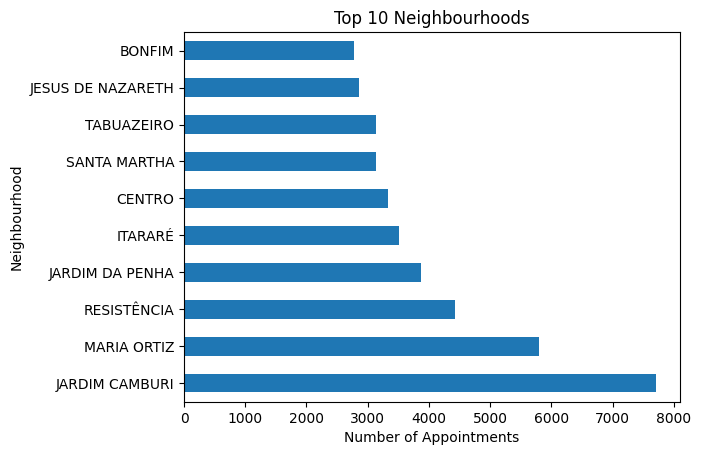

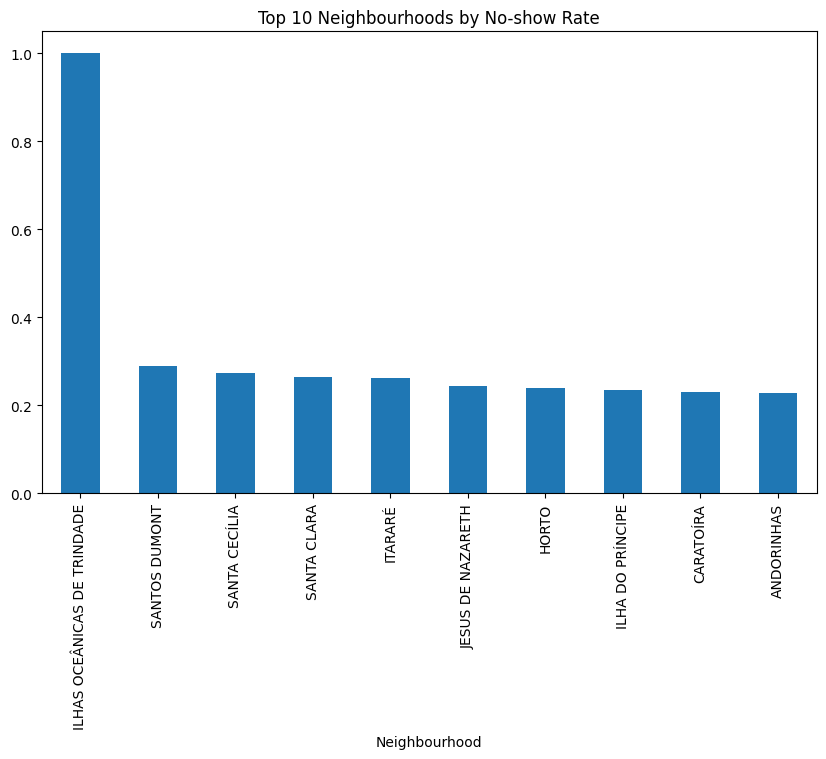

In [ ]:
import matplotlib.pyplot as plt
print(df['Neighbourhood'].describe())
print(df['Neighbourhood'].value_counts(normalize=True))
df['Neighbourhood'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Neighbourhoods')
plt.xlabel('Number of Appointments')
plt.ylabel('Neighbourhood')
plt.show()


counts = df.groupby(['Neighbourhood', 'No-show']).size().unstack(fill_value=0)
counts['No-show_rate'] = counts['Yes'] / (counts['Yes'] + counts['No'])
counts.sort_values(by='No-show_rate', ascending=False).head(10)

top_rate = counts ['No-show_rate'].sort_values(ascending=False).head(10)
top_rate.plot(kind='bar', figsize=(10,6), title='Top 10 Neighbourhoods by No-show Rate')
plt.show()


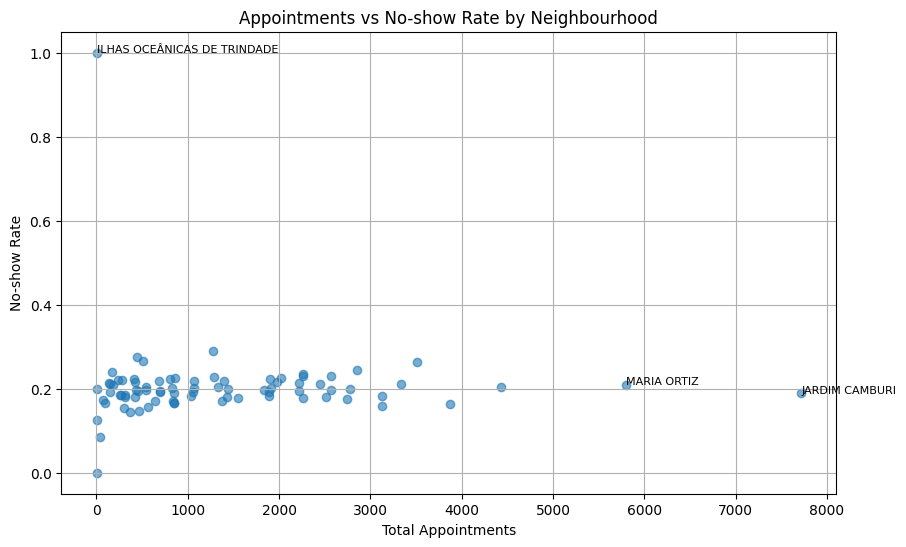

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 按社区统计总预约量和缺席率
stats = df.groupby('Neighbourhood').agg(
    total_appointments = ('No-show', 'count'),
    no_show_rate = ('No-show', lambda x: (x == 'Yes').mean())
).reset_index()

# 2. 画散点图
plt.figure(figsize=(10,6))
plt.scatter(stats['total_appointments'], stats['no_show_rate'], alpha=0.6)

# 3. 加标签（只标高缺席率或预约量大的社区）
for i, row in stats.iterrows():
    if row['total_appointments'] > 5000 or row['no_show_rate'] > 0.4:
        plt.text(row['total_appointments'], row['no_show_rate'], row['Neighbourhood'], fontsize=8)

plt.xlabel('Total Appointments')
plt.ylabel('No-show Rate')
plt.title('Appointments vs No-show Rate by Neighbourhood')
plt.grid(True)
plt.show()


Conclusion: Most communities have a no-show rate concentrated between 15% and 25%.
High-volume communities, such as JARDIM CAMBURI and MARIA ORTIZ, have relatively low and stable no-show rates.
The community with the highest no-show rate is ILHAS OCEÂNICAS DE TRINDADE, reaching 100%, with a very low appointment volume.